<div class="alert alert-block alert-warning">
For all of the datasets below:<br>
    - examine the data types of each column.<br>
    - ensure that the dates are in the proper format.<br>
    - set the dataframe's index to the date column as appropriate.<br>
    - For this exercise you'll need to install a library that will provide us access to some more datasets:<br>
    pip install vega_datasets</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vega_datasets import data

In [25]:
# Load San Fransico temperatue data

df = data.sf_temps()
df.shape

(8759, 2)

In [26]:
# Check the dtypes of the columns
print(df.dtypes)

# Check the first 5 rows of the dataset
df.head() # date col is not in proper format and is not index. 

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [27]:
# Remove the time from the datetime
df.date = pd.to_datetime(df.date.dt.date) # Make sure add pd.to_datetime() because df.date.dt.date returns str

# Print dtypes of the columns
print(df.dtypes)

# Check the first 5 rows of the dataset
df.head() # Column date is in proper format

temp           float64
date    datetime64[ns]
dtype: object


,temp,date
0,47.8,2010-01-01
1,47.4,2010-01-01
2,46.9,2010-01-01
3,46.5,2010-01-01
4,46.0,2010-01-01


In [28]:
# Set the date column as the index and sort the index
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01,47.8
2010-01-01,47.4
2010-01-01,46.9
2010-01-01,46.5
2010-01-01,46.0


In [32]:
# Print the shape and dtypes of the df
print(df.shape)
df.dtypes

(8759, 1)


temp    float64
dtype: object

# Remove time from datetime

df.date = pd.to_datetime(df.date.dt.date) # Make sure add pd.to_datetime() because df.date.dt.date returns str.
df.dtypes # date col is now in proper format

Use the above dataset for the exercises below:
1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [29]:
# Resample by day and take the average temerature
df.resample('1d').mean() # 365 rows, 1 date per row

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


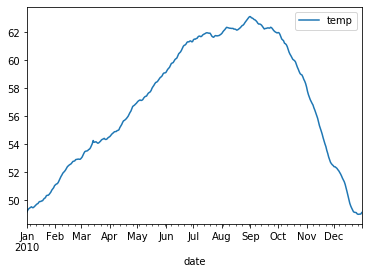

In [30]:
# Visualize the average temperature over time
df.resample('1d').mean().plot()

2. Write the code necessary to visualize the minimum temperature over time.

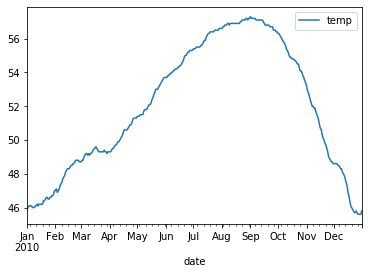

In [31]:
df.resample('1d').min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

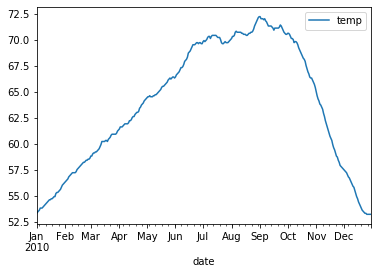

In [33]:
df.resample('1d').max().plot()

4. Which month is the coldest, on average?

In [56]:
# Resample by month, take the mean, order by temperature ascendinlgy, and take the first one
df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


5. Which month has the highest average temperature?

In [51]:
# Resample by month, take the mean, order by temperature ascendingly, and take the last one
df.resample('M').mean().sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [97]:
# Resample by the day and compute the min and max

df_d_minmax = df.resample('d').agg(['min', 'max'])
df_d_minmax.head() # Contain multi index column names

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [98]:
# Print out the column names
df_d_minmax.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [99]:
# Flat the multi-index column names

df_d_minmax.columns = df_d_minmax.columns.get_level_values(1)
df_d_minmax.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [100]:
# Compute the change in temperature for the day

df_d_minmax['tempdeltas'] = df_d_minmax['max'] - df_d_minmax['min']

print(df_d_minmax.shape)
df_d_minmax.head()

(365, 3)


,min,max,tempdeltas
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [92]:
# Resample by month, calculate the max temp for each month, order by temperature change ascendinlgy
# and take the last one

df_d_minmax.resample('M').max().sort_values(by='tempdeltas').tail(1)

,min,max,tempdeltas
date,,,
2010-08-31,57.2,72.2,15.0


7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

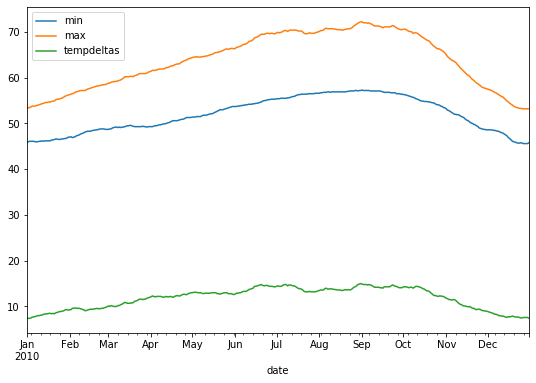

In [96]:
df_d_minmax.plot(figsize=(9,6))